Import Statements


In [6]:
import pandas as pd     #importing pandas to read csv file and manipulating DataFrames.
import numpy as np  
import nltk             #nltk is natural language processing toolkit used for various nlp techniques.
from sklearn.model_selection import train_test_split             #used for splitting train and test data.
from sklearn.feature_extraction.text import CountVectorizer      #To convert text into feature vectors.
from sklearn.metrics import accuracy_score, confusion_matrix     #To get performence metrics.
from nltk.corpus import stopwords               #To remove stopwords from the text.
df = pd.read_csv('Consumer_Complaints.csv') #Reading csv file and converting into pandas Dataframe.
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Westlake Services, LLC",MO,63122,NaN,NaN,Web,10/18/2019,Closed with explanation,Yes,NaN,3410477
1,10/18/2019,Checking or savings account,Checking account,Managing an account,Problem making or receiving payments,NaN,NaN,ALLY FINANCIAL INC.,AZ,85213,NaN,NaN,Web,10/18/2019,In progress,Yes,NaN,3409814
2,10/18/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11204,NaN,Consent not provided,Web,10/18/2019,Closed with explanation,Yes,NaN,3410009
3,10/18/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,NaN,NaN,NAVY FEDERAL CREDIT UNION,NaN,NaN,NaN,NaN,Referral,10/18/2019,In progress,Yes,NaN,3410507
4,10/18/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11204,NaN,Consent not provided,Web,10/18/2019,Closed with explanation,Yes,NaN,3410318


In [7]:
df.shape

(1411119, 18)

Data Preprocessing

In [13]:

from sklearn.utils import resample
print(df.isnull().sum())                       # number of null values by each column.
df = df[pd.notnull(df['Consumer disputed?'])]  #removing null values from consumer disputed columns.
                          #Filling remaining null values with space so that they can be vectorized.
#Combining multiple columns to vectorize the text data.
df=df.fillna("-")
df['prod']=df['Submitted via']+" "+df['Company response to consumer']+" "+df['Consumer complaint narrative']+" "+df['Company']+" "+df['Product']+" "+df['Issue']+" "+df['Consumer disputed?']+" "+df['Consumer consent provided?']
df['Timely response?']=df['Timely response?'].map(dict(Yes=1, No=0))     #Converting Yes and No to 1 and 0 for classification.
df['Consumer disputed?']=df['Consumer disputed?'].map(dict(Yes=1, No=0))
#Performing and operation on both columns to get data about good responses by the company.
#df['Consumer disputed?']=~df['Consumer disputed?']
#df['Timely response?']=df['Timely response?'] & df['Consumer disputed?']
#df_majority = df[df['Timely response?']==1]
#df_minority = df[df['Timely response?']==0]
 
#Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                replace=False,    # sample without replacement
                                 n_samples=400000,     # to match minority class
                                 random_state=1234) # reproducible results
 #
# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=200000,     # to match minority class
                                 random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
df = pd.concat([df, df_minority_upsampled])
 


Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Company                              0
State                             9225
ZIP code                          9278
Tags                            777945
Consumer consent provided?      528549
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
dtype: int64


Count of null values by each column

In [14]:
print(df['Timely response?'].value_counts()) #value counts of class label.

1    400000
0    221687
Name: Timely response?, dtype: int64


Textual data preprocessing(Stemming,Lemmatization)

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer    #Importing WordNetLemmatizer,PorterStemmer to perform lemmatization.
from nltk.stem import PorterStemmer 
from pywsd.utils import lemmatize_sentence
lemmatizer = WordNetLemmatizer() 
ps = PorterStemmer() 
for i,j in df['prod'].head().iteritems():         #Stemming and lemmatizing each word in the data frame 
  
  j=ps.stem(j)
  j=lemmatize_sentence(j)
print(df['prod'].head())                   #printing sample data after Stemming and Lemmatization.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Warming up PyWSD (takes ~10 secs)... 

900984    Web Closed with monetary relief - VW Credit Co...
153385    Web Closed with explanation - EQUIFAX, INC. Cr...
526879    Referral Closed with explanation - CITIBANK, N...
608882    Referral Closed with explanation - OCWEN LOAN ...
581020    Web Closed with explanation - OCWEN LOAN SERVI...
Name: prod, dtype: object


took 3.8232498168945312 secs.


Cross Validation

In [ ]:
#train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
#a1=train['prod']
#a2=train['Timely response?']
#a3=validate['prod']
#a4=validate['Timely response?']
#a5=validate['prod']
#a6=validate['Timely response?']
#xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)
#K-Fold cross validation.
cvec=CountVectorizer().fit(df['prod'])      #Converting the preprocessed text to count vectors.
df_train=cvec.transform(df['prod'])                             
df_test=df['Timely response?']                                  
X=df_train
y=df_test                                                       # Y label
from sklearn.linear_model import LogisticRegression              
scores = []
clf = LogisticRegression()
from sklearn.model_selection import cross_val_predict
cross_val_predict(clf, X, y, cv=10)                              #performing K-Fold cross validation with K=10;

D:\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation scores

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10)                       # Scores of all the 10 splits in K-Fold cross validation.

D:\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\AI\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.80694267, 0.80668245, 0.80722892, 0.80713784, 0.80795753,
       0.80725494, 0.80754118, 0.80839741, 0.80723691, 0.80654731])

Vectorization and splitting data

In [5]:
#performing test train split and implementing various classifier to see best algorithm for the dataset.
from sklearn.feature_extraction import text 
my_additional_stop_words=["XXXX","XX","N/A","Closed with explanation","-"]
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
cvec=CountVectorizer()
X=df['prod']
y=df['Timely response?']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 212)#Splitting train and test with 0.2 test size.
cvec=CountVectorizer(stop_words='english').fit(xTrain)
df_train=cvec.transform(xTrain)#Transform train text data into Count vectors.
df_test=cvec.transform(xTest) #Transform test text data into Count vectors.

Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression #importing Logistic regression model.
clf = LogisticRegression()                              
clf.fit(df_train,yTrain)                            #Fitting the training data
ypred=clf.predict(df_test)                          #Predicting the test data
from sklearn.metrics import accuracy_score, confusion_matrix  #Importing metrics
ypredtrain=clf.predict(df_train)                    #Predicting the train data
print("Train Accuracy",accuracy_score(yTrain,ypredtrain))  
print("Test Accuracy",accuracy_score(yTest,ypred))
from sklearn.metrics import classification_report 
report = classification_report(yTest,ypred)         #Classification report
print("Classification metrics:")
print(report)
print(confusion_matrix(yTest,ypred))

D:\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\AI\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy 0.8559924720870054
Test Accuracy 0.8518393411507343
Classification metrics:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     44162
           1       0.87      0.91      0.89     80176

   micro avg       0.85      0.85      0.85    124338
   macro avg       0.84      0.83      0.83    124338
weighted avg       0.85      0.85      0.85    124338

[[32754 11408]
 [ 7014 73162]]


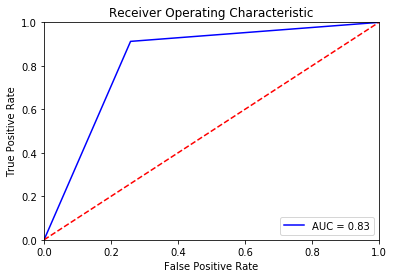

In [22]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
preds = ypred
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Mutinomial Naive Bayes Model

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(df_train,yTrain)                                        
ypred=clf.predict(df_test)
from sklearn.metrics import accuracy_score, confusion_matrix
ypredtrain=clf.predict(df_train)
print("Train Accuracy",accuracy_score(yTrain,ypredtrain))
print("Test Accuracy",accuracy_score(yTest,ypred))
from sklearn.metrics import classification_report
report = classification_report(yTest,ypred)
print("Classification metrics:")
print(report)
print(confusion_matrix(yTest,ypred))

Train Accuracy 0.780884248284404
Test Accuracy 0.7789171452009844
Classification metrics:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     44162
           1       0.82      0.84      0.83     80176

   micro avg       0.78      0.78      0.78    124338
   macro avg       0.76      0.75      0.76    124338
weighted avg       0.78      0.78      0.78    124338

[[29353 14809]
 [12680 67496]]


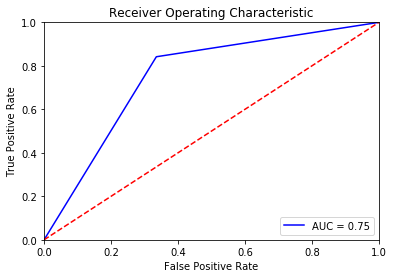

In [16]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
preds = ypred
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AdaBoost Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(df_train,yTrain)
ypred=clf.predict(df_test)
from sklearn.metrics import accuracy_score, confusion_matrix
ypredtrain=clf.predict(df_train)
print("Train Accuracy",accuracy_score(yTrain,ypredtrain))
print("Test Accuracy",accuracy_score(yTest,ypred))
from sklearn.metrics import classification_report
report = classification_report(yTest,ypred)
print("Classification metrics:")
print(report)
print(confusion_matrix(yTest,ypred))

Train Accuracy 0.7691681294221965
Test Accuracy 0.7702391867329377
Classification metrics:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65     44162
           1       0.80      0.86      0.83     80176

   micro avg       0.77      0.77      0.77    124338
   macro avg       0.75      0.73      0.74    124338
weighted avg       0.77      0.77      0.77    124338

[[26493 17669]
 [10899 69277]]


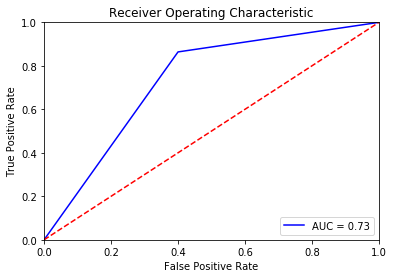

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
preds = ypred
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(df_train,yTrain)
ypred=clf.predict(df_test)
from sklearn.metrics import accuracy_score, confusion_matrix
ypredtrain=clf.predict(df_train)
print("Train Accuracy",accuracy_score(yTrain,ypredtrain))
print("Test Accuracy",accuracy_score(yTest,ypred))
from sklearn.metrics import classification_report
report = classification_report(yTest,ypred)
print("Classification metrics:")
print(report)
print(confusion_matrix(yTest,ypred))

Train Accuracy 0.7802609435225566
Test Accuracy 0.7824719715613891
Classification metrics:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65     44162
           1       0.79      0.90      0.84     80176

   micro avg       0.78      0.78      0.78    124338
   macro avg       0.77      0.73      0.75    124338
weighted avg       0.78      0.78      0.77    124338

[[25207 18955]
 [ 8092 72084]]


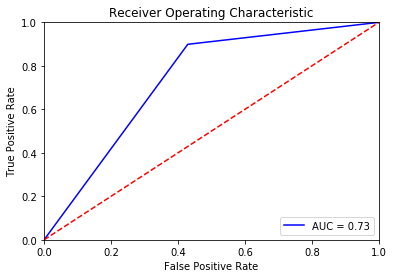

In [20]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
preds = ypred
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()